### Lemma: 2 Matrices that share the same eigenvectors commute under matrix multiplication

(using column-vector convention)

$$
    K \vec{v} = \lambda \vec{v} \\

    V^T D_1 V = K_1 \\

    V^T D_2 V = K_2 \\

    D_1 D_2 = D_2 D_1 \\

    K_1 K_2 = V^T D_1 V V^T D_2 V = V^T D_1 D_2 V = K_2 K_1
$$

# Deduction: Eigendecomposition of any circulant matrix is DFT

(using column-vector convention)

$$
K \vec{v} = \lambda \vec{v} \\

K V = D V \\

V^{-1} D V = V^T D V = K \\
$$

### Lemma: $V$ is all real iff. $K$ is Hermitian, including symmetric

(proof skipped)

### Lemma: circulant matrix $C$ has 2 constraints:

- All real & symmetric:

$$
C^T = C
$$

- define linear operator for "cyclic shifting up by 1": $U$

$$
(U(U C)^T)^T = C \\

C U^T = (UC)^T = U^{-1} C \\
$$

### Lemma: $\vec{1}$ is the first eigenvector:

$$
C \vec{1} = \lambda \vec{1}
$$

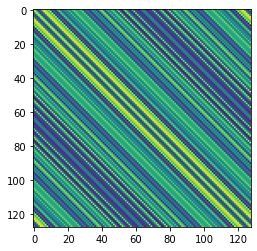

In [1]:
import torch
from torch import Tensor
from matplotlib import pyplot

# random circulant matrix

nDim = 128
base = torch.rand([nDim])

for i in range(0, int(nDim/2) ):
    base[nDim - i - 1] = base[i + 1]

circ=lambda v:torch.cat([f:=v.flip(0),f[:-1]]).unfold(0,len(v),1).flip(0)

matrix = circ(base)

pyplot.imshow(matrix)

In [2]:
def laplacian(vec: Tensor):
    shift1 = torch.roll(vec, 1, 0)
    diff = shift1 - vec
    return torch.norm(diff).item()

print(laplacian(torch.rand(5)))

1.1709403991699219


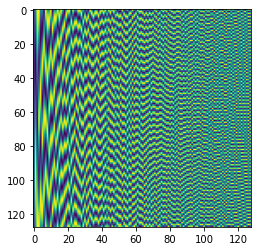

In [3]:
eigs = torch.eig(matrix, eigenvectors=True)

columnLaplacians = Tensor()

columnIs = torch.Tensor(range(0, nDim))

def _tt(i: float):
    result = laplacian(eigs.eigenvectors[:,int(i)])
    return result

eigVNorms = columnIs.apply_(_tt)

order = torch.sort(eigVNorms)

eigVSorted = eigs.eigenvectors[:, order.indices]

pyplot.imshow(eigVSorted)

torch.Size([640, 480])


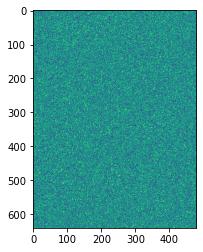

In [4]:
pyplot.imshow(torch.rand(640,  480))

print(torch.rand(640,  480).shape)